## Healthy Habits: Exploring Organic Food Purchases on Instacart

Organic food has become increasingly popular among health-conscious consumers, and Instacart’s data offers valuable insights into these shopping habits. This analysis dives into how customers prioritize organic products, the frequency of purchases, and the types of organic items most commonly added to carts. By understanding these patterns, we can uncover trends and preferences that shape the organic food market on Instacart.

recommend items for users while they shop:
enabling Instacart to revolutionize how consumers discover and purchase groceries.

We already know fruits are reordered more frequently than vegetables(3 Million Instacart Orders, Open Sourced)
“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on <date>

Fruits are reordered more frequently than vegetables — perhaps because vegetables are more intermittently purchased for recipes. Staples like soups and baking ingredients are least likely to be reordered — perhaps because they are less frequently needed.

Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.

#Citation: jeremy stanley, Meg Risdal, sharathrao, Will Cukierski. (2017). Instacart Market Basket Analysis. Kaggle. https://kaggle.com/competitions/instacart-market-basket-analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from textwrap import wrap

In [5]:
#Importing the dataset

df_products = pd.read_csv('instacart_markey_basket_analysis/products.csv')
df_aisles = pd.read_csv('instacart_markey_basket_analysis/aisles.csv')
df_departments = pd.read_csv('instacart_markey_basket_analysis/departments.csv')
df_orders = pd.read_csv('instacart_markey_basket_analysis/orders.csv') 
df_ordprior = pd.read_csv('instacart_markey_basket_analysis/order_products__prior.csv') 

In [6]:
df_pa = pd.merge(df_products, df_aisles, how='inner', on='aisle_id')
df_prod_ais_dep = pd.merge(df_pa, df_departments, how='inner', on='department_id')
df_prod_ais_dep = df_prod_ais_dep.drop(['aisle_id', 'department_id'], axis = 1)
df_prod_ais_dep.head()

,product_id,product_name,aisle,department
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks
1,2,All-Seasons Salt,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen
4,5,Green Chile Anytime Sauce,marinades meat preparation,pantry


In [7]:
df_orders = pd.merge(df_orders, df_ordprior, how='inner', on='order_id')
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [8]:
df_orders_product = pd.merge(df_orders, df_prod_ais_dep, how='inner', on='product_id' )
df_orders_product.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,paper goods,household


## Exploratory Data Analysis on **ALL** Orders 

In [10]:
df_orders_hour_freq = df_orders['order_hour_of_day'].value_counts().reset_index().sort_values('order_hour_of_day', ascending = True).reset_index(drop = True)
df_orders_hour_freq.columns = ['hour', 'count']

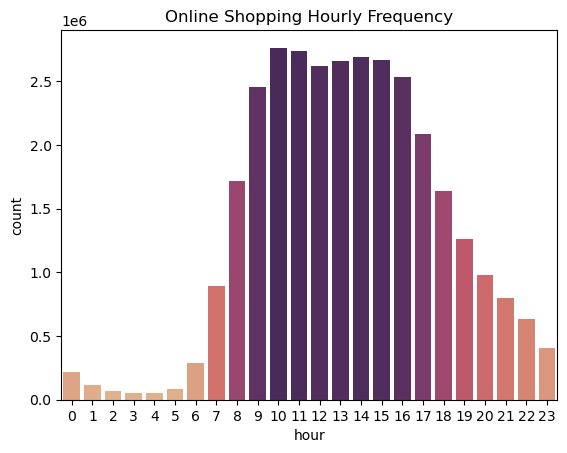

In [11]:
sns.barplot(x='hour', y='count', hue='count', data=df_orders_hour_freq, palette='flare', legend=False)
plt.title('Online Shopping Hourly Frequency')
plt.show()

Peak hours of the day for online shopping are from 9 AM to 5 PM

In [14]:
df_orders_day_freq = df_orders['order_dow'].value_counts().reset_index().sort_values('order_dow', ascending = True).reset_index(drop = True)
df_orders_day_freq.columns = ['day', 'count']

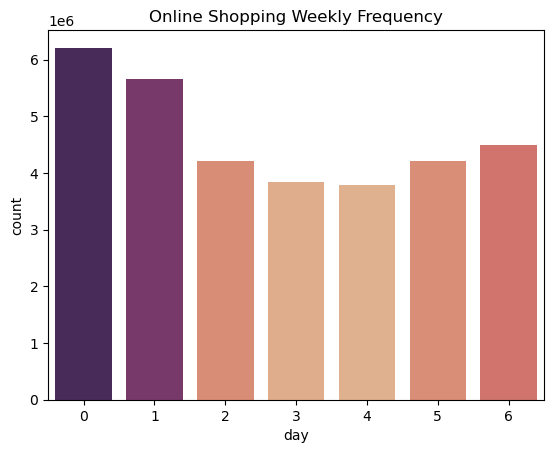

In [15]:
sns.barplot(x='day', y='count', hue='count', data=df_orders_day_freq, palette='flare', legend=False)
plt.title('Online Shopping Weekly Frequency')
plt.show()

Weekends (Saturday and Sunday) generally have higher orders than other days of the week.

Day 0 = Saturday, Day 1 = Sunday

In [17]:
df_orders_day_since_order = df_orders['days_since_prior_order'].value_counts().reset_index().sort_values('days_since_prior_order', ascending = True).reset_index(drop = True)
df_orders_day_since_order.columns = ['days_since_prior_order', 'count']

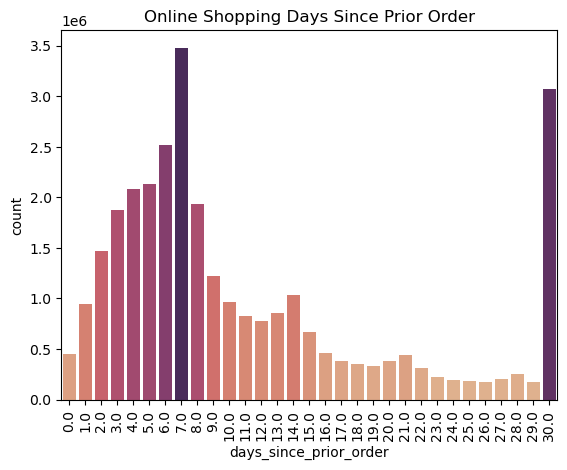

In [18]:
sns.barplot(x='days_since_prior_order', y='count', hue='count', data=df_orders_day_since_order, palette='flare', legend=False)
plt.title('Online Shopping Days Since Prior Order')
plt.xticks(rotation=90)
plt.show()

The most common reorder times occur one week and one month after purchase, with a slight increase in orders on weekends. The first week post-purchase also shows high activity. According to Kaggle’s dataset description, all orders with days_since_prior_order greater than 30 days are capped at 30, creating the highest peak at 30 days on the graph.

In [20]:
df_products[df_products['product_name'].str.contains('Organic')].product_name.value_counts().reset_index()

,product_name,count
0,Organic Turkey Burgers,1
1,Organic Chunky Tomato Bisque Soup,1
2,Organic Half & Half Guayusa Lemonade Tea,1
3,Organic Persian Cucumbers,1
4,Organic & Raw Trilogy,1
...,...,...
5030,Organic Peach Lemonade,1
5031,Organic Sweet & Salty Peanut Choco Chewy Grano...,1
5032,Organic Just Apples,1
5033,Organic Argan Skin Care Oil,1


## Exploratory Data Analysis on **Orders Including Organic Products**

**Hypothesis**: individuals who value health and engage in the “Food as Medicine” segment are more likely to regularly purchase organic products. These consumers typically prioritize quality, natural ingredients, and the health benefits associated with their food choices. Organic products align with their preference for minimally processed, pesticide-free options that are perceived as healthier and more nutritious, supporting their overall wellness goals.

To filter orders that contain at least one organic product, I need to first find all organic products, and then group by order_ID to find orders containing organic products.

In [23]:
# Filter products that are organic
df_organic_product = df_orders_product[df_orders_product['product_name'].str.contains('Organic')]
# Identify unique order_ids for orders containing organic product
organic_order_ids = df_organic_product['order_id'].unique()
# Filter the df_orders_product dataframe to include only orders with at least one organic product
df_organic_orders_product = df_orders_product[df_orders_product['order_id'].isin(organic_order_ids)]
df_organic_orders_product.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,paper goods,household


In [24]:
df_organic_orders_product.order_id.nunique()

2367444

In [25]:
df_orders.order_id.nunique()

3214874

In [26]:
2367444/3214874

0.736403355154821

73.6% of instacart orders contains organic products. 

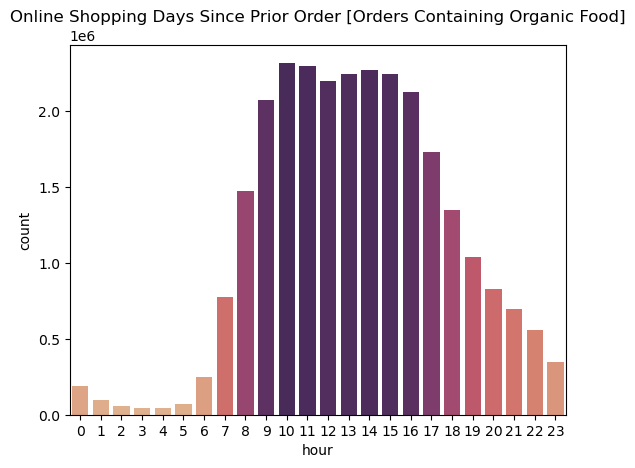

In [28]:
df_organic_orders_hour_freq = df_organic_orders_product['order_hour_of_day'].value_counts().reset_index().sort_values('order_hour_of_day', ascending = True).reset_index(drop = True)
df_organic_orders_hour_freq.columns = ['hour', 'count']

sns.barplot(x='hour', y='count', hue='count', data=df_organic_orders_hour_freq, palette='flare', legend=False)
plt.title('Online Shopping Days Since Prior Order [Orders Containing Organic Food]')
plt.show()

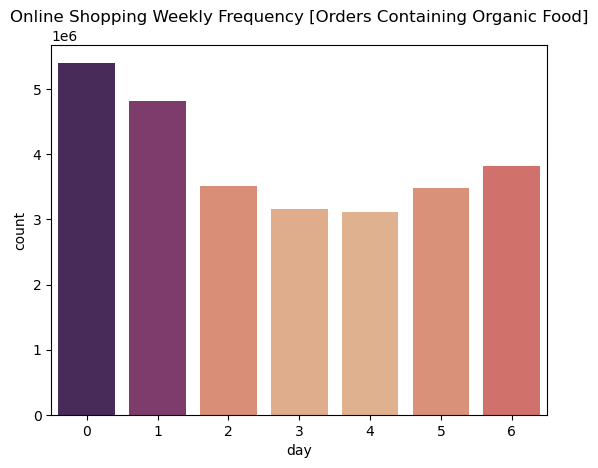

In [29]:
df_organic_orders_day_freq = df_organic_orders_product['order_dow'].value_counts().reset_index().sort_values('order_dow', ascending = True).reset_index(drop = True)
df_organic_orders_day_freq.columns = ['day', 'count']

# Map the days to abbreviations
day_mapping = {
    0: 'Sun',
    1: 'M',
    2: 'Tue',
    3: 'W',
    4: 'T',
    5: 'F',
    6: 'Sat'
}

# Apply the mapping to the DataFrame
df_organic_orders_day_freq['day'] = df_organic_orders_day_freq['day'].map(day_mapping)

sns.barplot(x='day', y='count', hue='count', data=df_organic_orders_day_freq, palette='flare', legend=False)
plt.title('Online Shopping Weekly Frequency [Orders Containing Organic Food]')
plt.show()

Online shopping activity peaks during late morning to early afternoon hours (9 AM - 5 PM) and is most frequent on weekends (Saturday and Sunday)

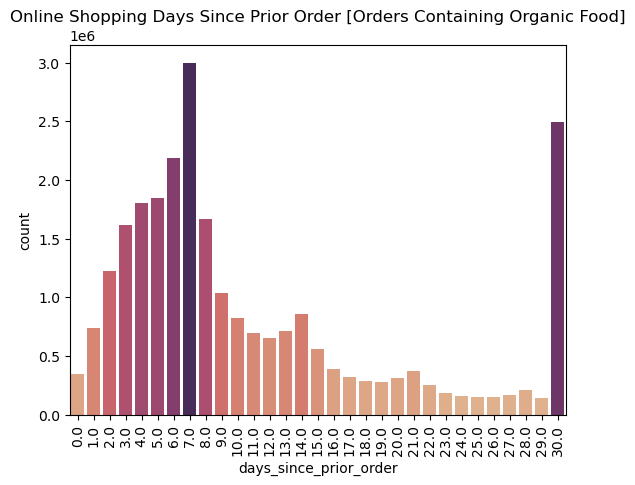

In [30]:
df_organic_orders_day_since_order = df_organic_orders_product['days_since_prior_order'].value_counts().reset_index().sort_values('days_since_prior_order', ascending = True).reset_index(drop = True)
df_organic_orders_day_since_order.columns = ['days_since_prior_order', 'count']

sns.barplot(x='days_since_prior_order', y='count', hue='count', data=df_organic_orders_day_since_order, palette='flare', legend=False)
plt.title('Online Shopping Days Since Prior Order [Orders Containing Organic Food]')
plt.xticks(rotation=90)
plt.show()

## Organic Products at Instacart

In [32]:
# Filtering Organic Product information 
df_organic_prod_ais_dep = df_prod_ais_dep[df_prod_ais_dep['product_name'].str.contains('Organic')]
organic_product_ids = df_organic_product['product_id'].unique()
df_organic_prod_ais_dep = df_organic_prod_ais_dep[df_organic_prod_ais_dep['product_id'].isin(organic_product_ids)]
df_organic_prod_ais_dep.head()

,product_id,product_name,aisle,department
22,23,Organic Turkey Burgers,packaged poultry,meat seafood
32,33,Organic Spaghetti Style Pasta,dry pasta,dry goods pasta
40,41,Organic Sourdough Einkorn Crackers Rosemary,crackers,snacks
42,43,Organic Clementines,packaged vegetables fruits,produce
46,47,Onion Flavor Organic Roasted Seaweed Snack,asian foods,international


In [80]:
df_organic_product['product_id'].nunique()

5035

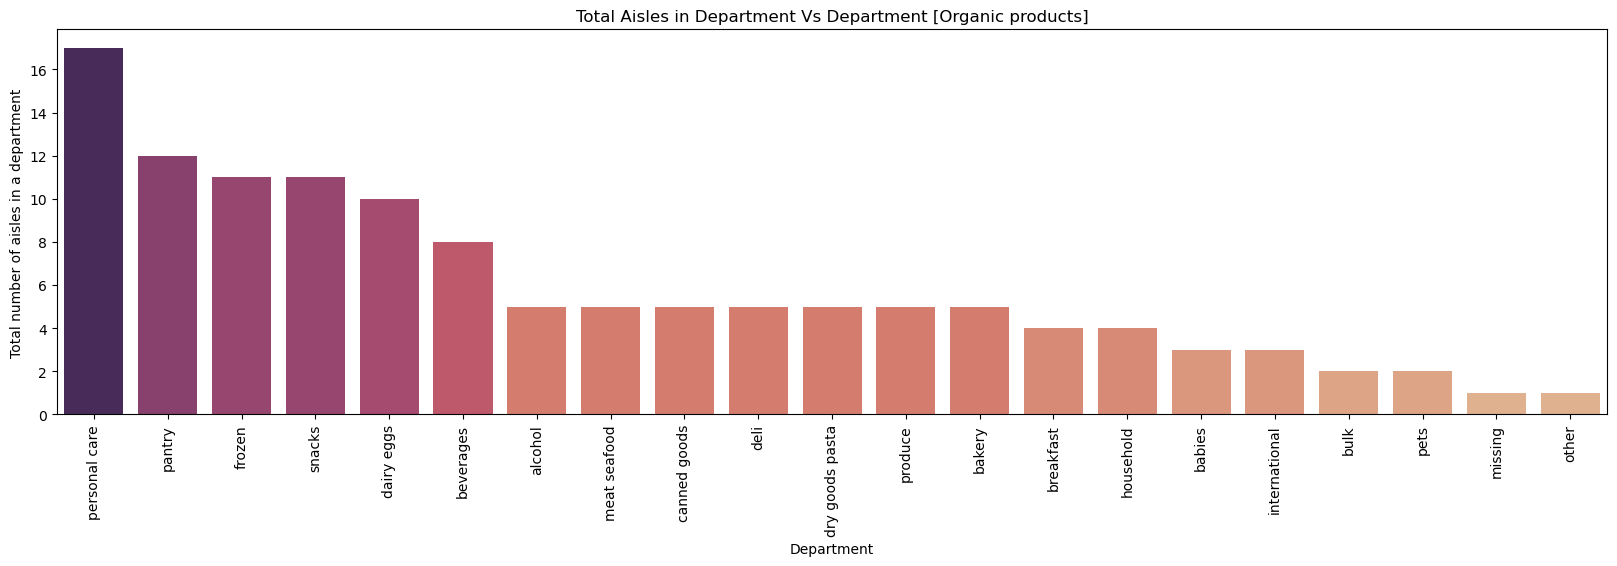

In [33]:
data = df_organic_prod_ais_dep.groupby("department")["aisle"].nunique().sort_values(ascending=False)
fig = plt.figure(figsize=(20,5))
sns.barplot(x = data.index, y = data.values, hue=data.values, palette='flare', legend=False)
plt.xlabel("Department")
plt.ylabel("Total number of aisles in a department")
plt.title("Total Aisles in Department Vs Department [Organic products]")
plt.xticks(rotation = 90)
plt.show()

## Organic Products Orders Analysis

In [35]:
df_organic_product.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle,department
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs
8,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,fresh fruits,produce
14,473747,1,prior,3,3,12,21.0,25133,4,0,Organic String Cheese,packaged cheese,dairy eggs
19,2254736,1,prior,4,4,7,29.0,25133,4,1,Organic String Cheese,packaged cheese,dairy eggs
24,431534,1,prior,5,4,15,28.0,25133,4,1,Organic String Cheese,packaged cheese,dairy eggs


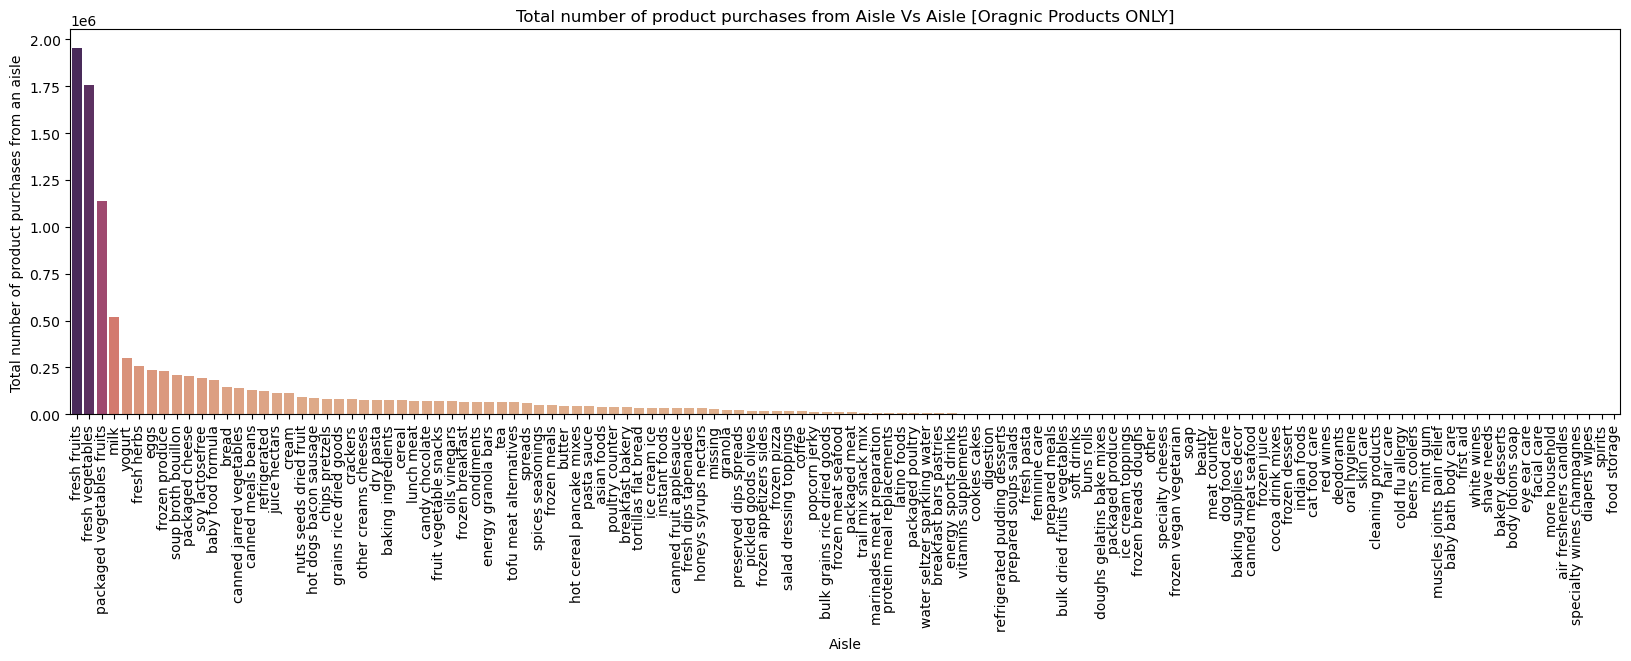

In [36]:
data = df_organic_product.groupby("aisle")["product_id"].count().sort_values(ascending=False)
fig = plt.figure(figsize=(20,5))
sns.barplot(x = data.index, y = data.values, hue=data.values, palette='flare', legend=False)
plt.xlabel("Aisle")
plt.ylabel("Total number of product purchases from an aisle")
plt.title("Total number of product purchases from Aisle Vs Aisle [Oragnic Products ONLY]")
plt.xticks(rotation = 90)
plt.show()

Fresh fruits, fresh vegetables, packaged vegetables fruits, yogurt, cheese, milk aisles highly dominates in terms of number of product purchases

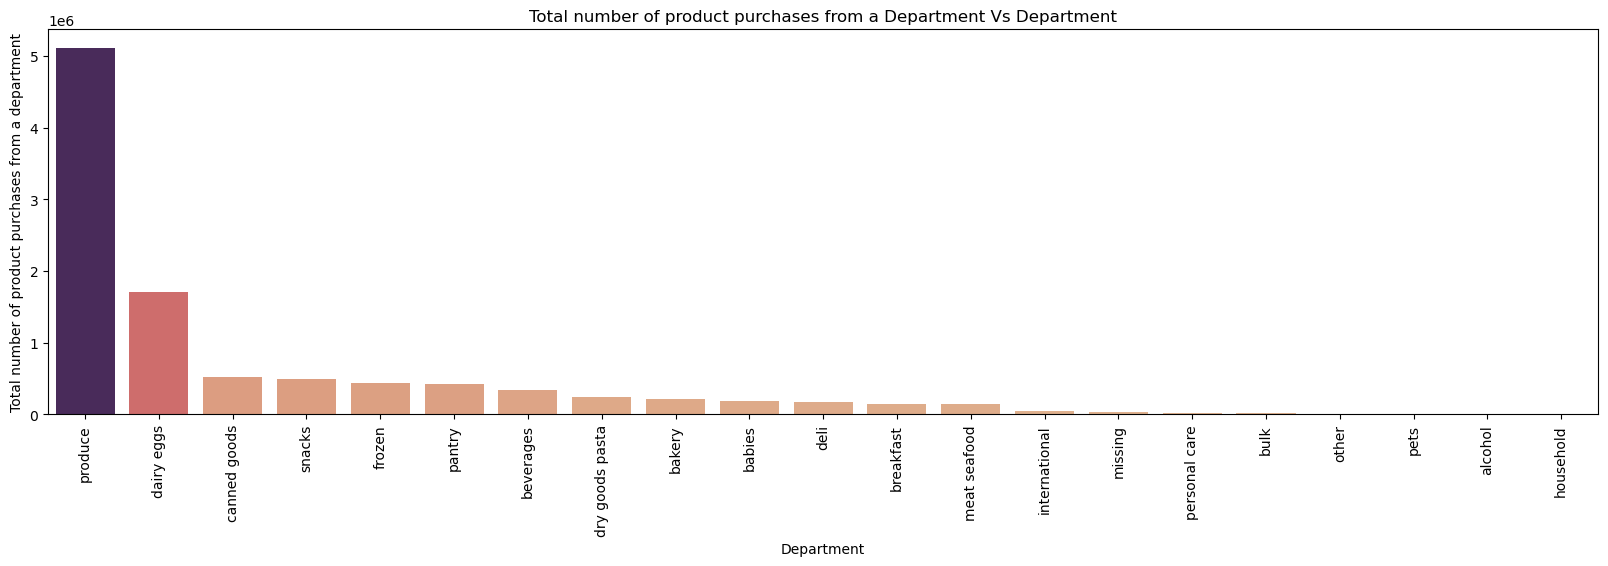

In [38]:
data = df_organic_product.groupby("department")["product_id"].count().sort_values(ascending=False)
fig = plt.figure(figsize=(20,5))
sns.barplot(x = data.index, y = data.values, hue=data.values, palette='flare', legend=False)
plt.xlabel("Department")
plt.ylabel("Total number of product purchases from a department")
plt.title("Total number of product purchases from a Department Vs Department")
plt.xticks(rotation = 90)
plt.show()

## Reorders

In [40]:
df_organic_reorder = df_organic_product.groupby('product_name')['reordered'].agg(['count', 'sum']).reset_index()
df_organic_reorder.columns = ['product_name', 'total_purchase', 'reorders']
df_organic_reorder['% of reorder'] = df_organic_reorder['reorders']/df_organic_reorder['total_purchase'] * 100
df_organic_reorder.sort_values('total_purchase', ascending = False).reset_index(drop = True).head(10)

,product_name,total_purchase,reorders,% of reorder
0,Bag of Organic Bananas,379450,315913,83.255501
1,Organic Strawberries,264683,205845,77.770389
2,Organic Baby Spinach,241921,186884,77.250011
3,Organic Hass Avocado,213584,170131,79.655311
4,Organic Avocado,176815,134044,75.810310
5,Organic Whole Milk,137905,114510,83.035423
6,Organic Raspberries,137057,105409,76.908877
7,Organic Yellow Onion,113426,79072,69.712412
8,Organic Garlic,109778,74663,68.012717
9,Organic Zucchini,104823,72165,68.844624


In [41]:
df_organic_reorder = df_organic_product.groupby('product_name')['reordered'].agg(['count', 'sum']).reset_index()
df_organic_reorder.columns = ['product_name', 'total_purchase', 'reorders']
df_organic_reorder['% of reorder'] = df_organic_reorder['reorders']/df_organic_reorder['total_purchase'] * 100
df_organic_reorder.sort_values('% of reorder', ascending = False).reset_index(drop = True).head(10)

,product_name,total_purchase,reorders,% of reorder
0,Organic Blueberry B Mega,96,85,88.541667
1,Whole Organic Omega 3 Milk,9108,7835,86.023276
2,Organic Lactose Free Whole Milk,8477,7282,85.903032
3,Organic Homogenized Whole Milk,3970,3405,85.768262
4,"Milk, Organic, Vitamin D",20198,17256,85.434201
5,Organic Super Berry Juice,27,23,85.185185
6,Organic Reduced Fat Milk,35663,30338,85.068558
7,Organic Dark Chocolate Bar with Sea Salt and T...,99,84,84.848485
8,Organic Raspberry Black Tea,39,33,84.615385
9,Organic Whole Milk,9842,8279,84.119081


In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.206.40.137:8501

/opt/anaconda3/lib/python3.12/site-packages/streamlit/util.py:227: RuntimeWarning: coroutine 'expire_cache' was never awaited
  pass
/opt/anaconda3/lib/python3.12/site-packages/streamlit/util.py:227: RuntimeWarning: coroutine 'expire_cache' was never awaited
  pass
